<a href="https://colab.research.google.com/github/cheryl1411/Analysis-Porfolio/blob/main/Machine_learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [60]:
df = pd.read_excel("/content/drive/MyDrive/file/Adidas US.xlsx")
df

Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear            50.0        1200   
1       New York    Men's Athletic Footwear            50.0        1000   
2       New York    Women's Street Footwear            40.0        1000   
3       New York  Women's Athletic Footwear            45.0         850   
4       New York              Men's Apparel            60.0         900   
...          ...                        ...             ...         ...   
9643  Manchester              Men's Apparel            50.0          64   
9644  Manchester            Women's Apparel            41.0         105   
9645  Manchester      Men's Street Footwear            41.0         184   
9646  Manchester    Men's Athletic Footwear            42.0          70   
9647  Manchester    Women's Street Footwear            29.0          83   

      Total Sales  Operating Profit  Operating Margin Sales Method  
0        600000.0         300000.00              0.50     In-store  
1        500000.0         150000.00              0.30     In-store  
2        400000.0         140000.00              0.35     In-store  
3        382500.0         133875.00              0.35     In-store  
4        540000.0         162000.00              0.30     In-store  
...           ...               ...               ...          ...  
9643       3200.0            896.00              0.28       Outlet  
9644       4305.0           1377.60              0.32       Outlet  
9645       7544.0           2791.28              0.37       Outlet  
9646       2940.0           1234.80              0.42       Outlet  
9647       2407.0            649.89              0.27       Outlet  

[9648 rows x 13 columns]

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

In [63]:
df.shape

(9648, 13)

In [64]:
train_df =df.sample(frac = 0.8, random_state =42)

In [65]:
test_df=df.drop(train_df.index)

In [66]:
print(train_df.shape, test_df.shape)

(7718, 13) (1930, 13)


In [67]:
train_df.tail()

Retailer  Retailer ID Invoice Date     Region     State      City  \
5481    Foot Locker      1128299   2021-04-24  Southeast  Virginia  Richmond   
1708  Sports Direct      1185732   2021-11-16    Midwest  Michigan   Detroit   
5495    Foot Locker      1128299   2021-06-24  Southeast  Virginia  Richmond   
5291        Walmart      1128299   2021-08-17  Southeast   Florida   Orlando   
1408        Walmart      1128299   2021-09-18  Southeast   Florida   Orlando   

                      Product  Price per Unit  Units Sold  Total Sales  \
5481    Men's Street Footwear            52.0         124       6448.0   
1708  Men's Athletic Footwear            45.0         500     225000.0   
5495  Women's Street Footwear            73.0         195      14235.0   
5291  Women's Street Footwear            78.0         189      14742.0   
1408  Men's Athletic Footwear            65.0         500     325000.0   

      Operating Profit  Operating Margin Sales Method  
5481           3095.04              0.48       Online  
1708          90000.00              0.40     In-store  
5495           6832.80              0.48       Online  
5291           6339.06              0.43       Online  
1408          81250.00              0.25     In-store

In [68]:
train_df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [69]:
train_df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [70]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']


In [71]:
continuous_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [72]:
numerical_data

['Retailer ID',
 'Invoice Date',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin']

In [73]:
continuous_data

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

In [74]:
train_df[numerical_data].describe()

Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  7.718000e+03     7718.000000  7718.000000    7718.000000   
mean   1.173801e+06       45.252267   256.278051   92986.660534   
std    2.637854e+04       14.742680   214.093611  141816.704314   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4218.750000   
50%    1.185732e+06       45.000000   176.000000    9517.000000   
75%    1.185732e+06       55.000000   349.750000  148750.000000   
max    1.197831e+06      110.000000  1275.000000  810000.000000   

       Operating Profit  Operating Margin  
count       7718.000000       7718.000000  
mean       34374.570179          0.423091  
std        54287.199513          0.096825  
min            0.000000          0.100000  
25%         1912.910000          0.350000  
50%         4365.090000          0.410000  
75%        52000.000000          0.490000  
max       390000.000000          0.800000

In [75]:
train_df[numerical_data].corr()

<ipython-input-75-827b1bba483d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df[numerical_data].corr()


Retailer ID  Price per Unit  Units Sold  Total Sales  \
Retailer ID          1.000000       -0.397441   -0.007780    -0.087872   
Price per Unit      -0.397441        1.000000    0.264706     0.432895   
Units Sold          -0.007780        0.264706    1.000000     0.913901   
Total Sales         -0.087872        0.432895    0.913901     1.000000   
Operating Profit    -0.030419        0.389209    0.894081     0.955361   
Operating Margin     0.219678       -0.142937   -0.300294    -0.361793   

                  Operating Profit  Operating Margin  
Retailer ID              -0.030419          0.219678  
Price per Unit            0.389209         -0.142937  
Units Sold                0.894081         -0.300294  
Total Sales               0.955361         -0.361793  
Operating Profit          1.000000         -0.206330  
Operating Margin         -0.206330          1.000000

In [76]:
train_df[numerical_data].skew()

<ipython-input-76-6773749b531a>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df[numerical_data].skew()


Retailer ID        -1.076775
Price per Unit      0.363360
Units Sold          1.476657
Total Sales         1.847043
Operating Profit    2.240762
Operating Margin    0.200958
dtype: float64

In [77]:
!pip install ydata_profiling


In [79]:
import ydata_profiling as pp

In [80]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. Understanding Data with visualization.



1.   Univariate plots
- Histogram
- Density Plots
- Box and Whisker Plot
2.   Multivariate plots
- Correlation Matrix plot.
- Scatter plot Matrix.


In [85]:
numerical_data.remove('Retailer ID')

In [86]:
numerical_data

['Invoice Date',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin']

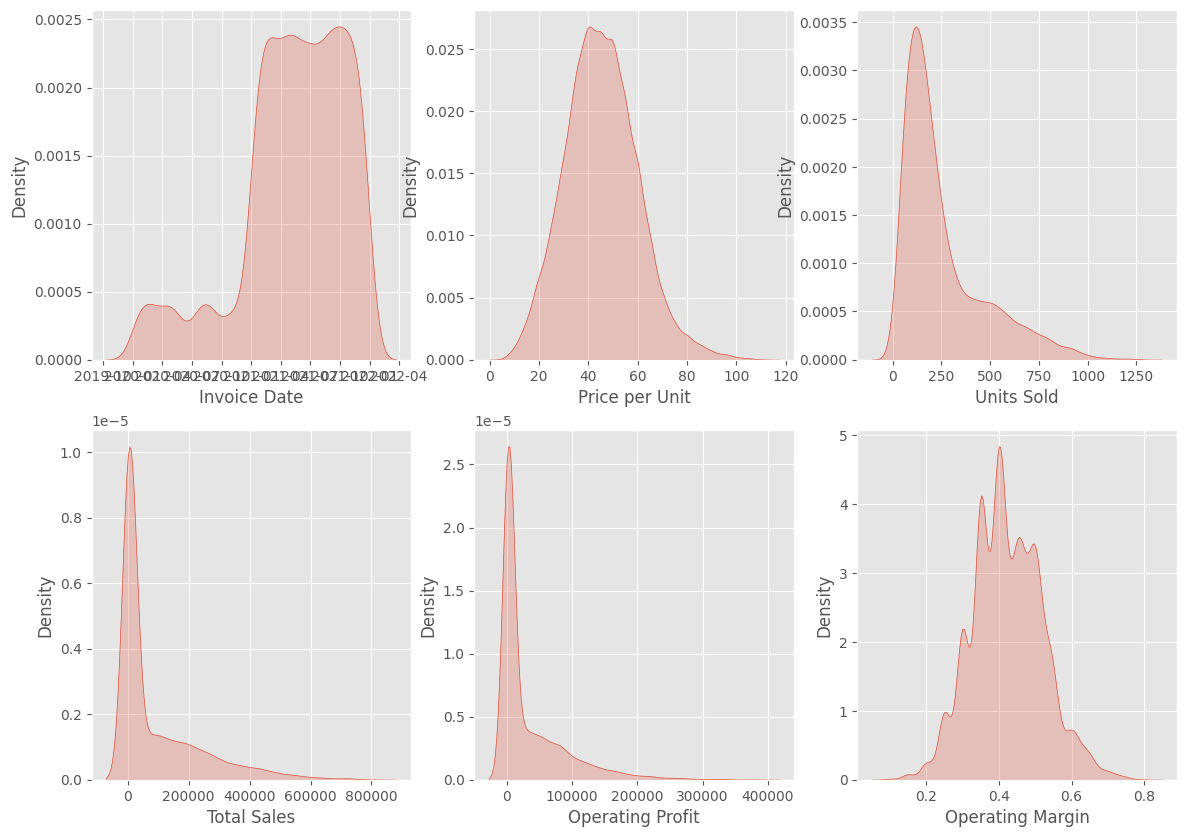

In [91]:
fid, axes = plt.subplots(nrows = 2, ncols=3, figsize =(14,10))
for i, colum in enumerate(numerical_data):
  row= i // 3
  col=i%3
  ax = axes[row, col]
  sns.kdeplot(data = train_df[colum], ax=ax, fill = True)
plt.show()


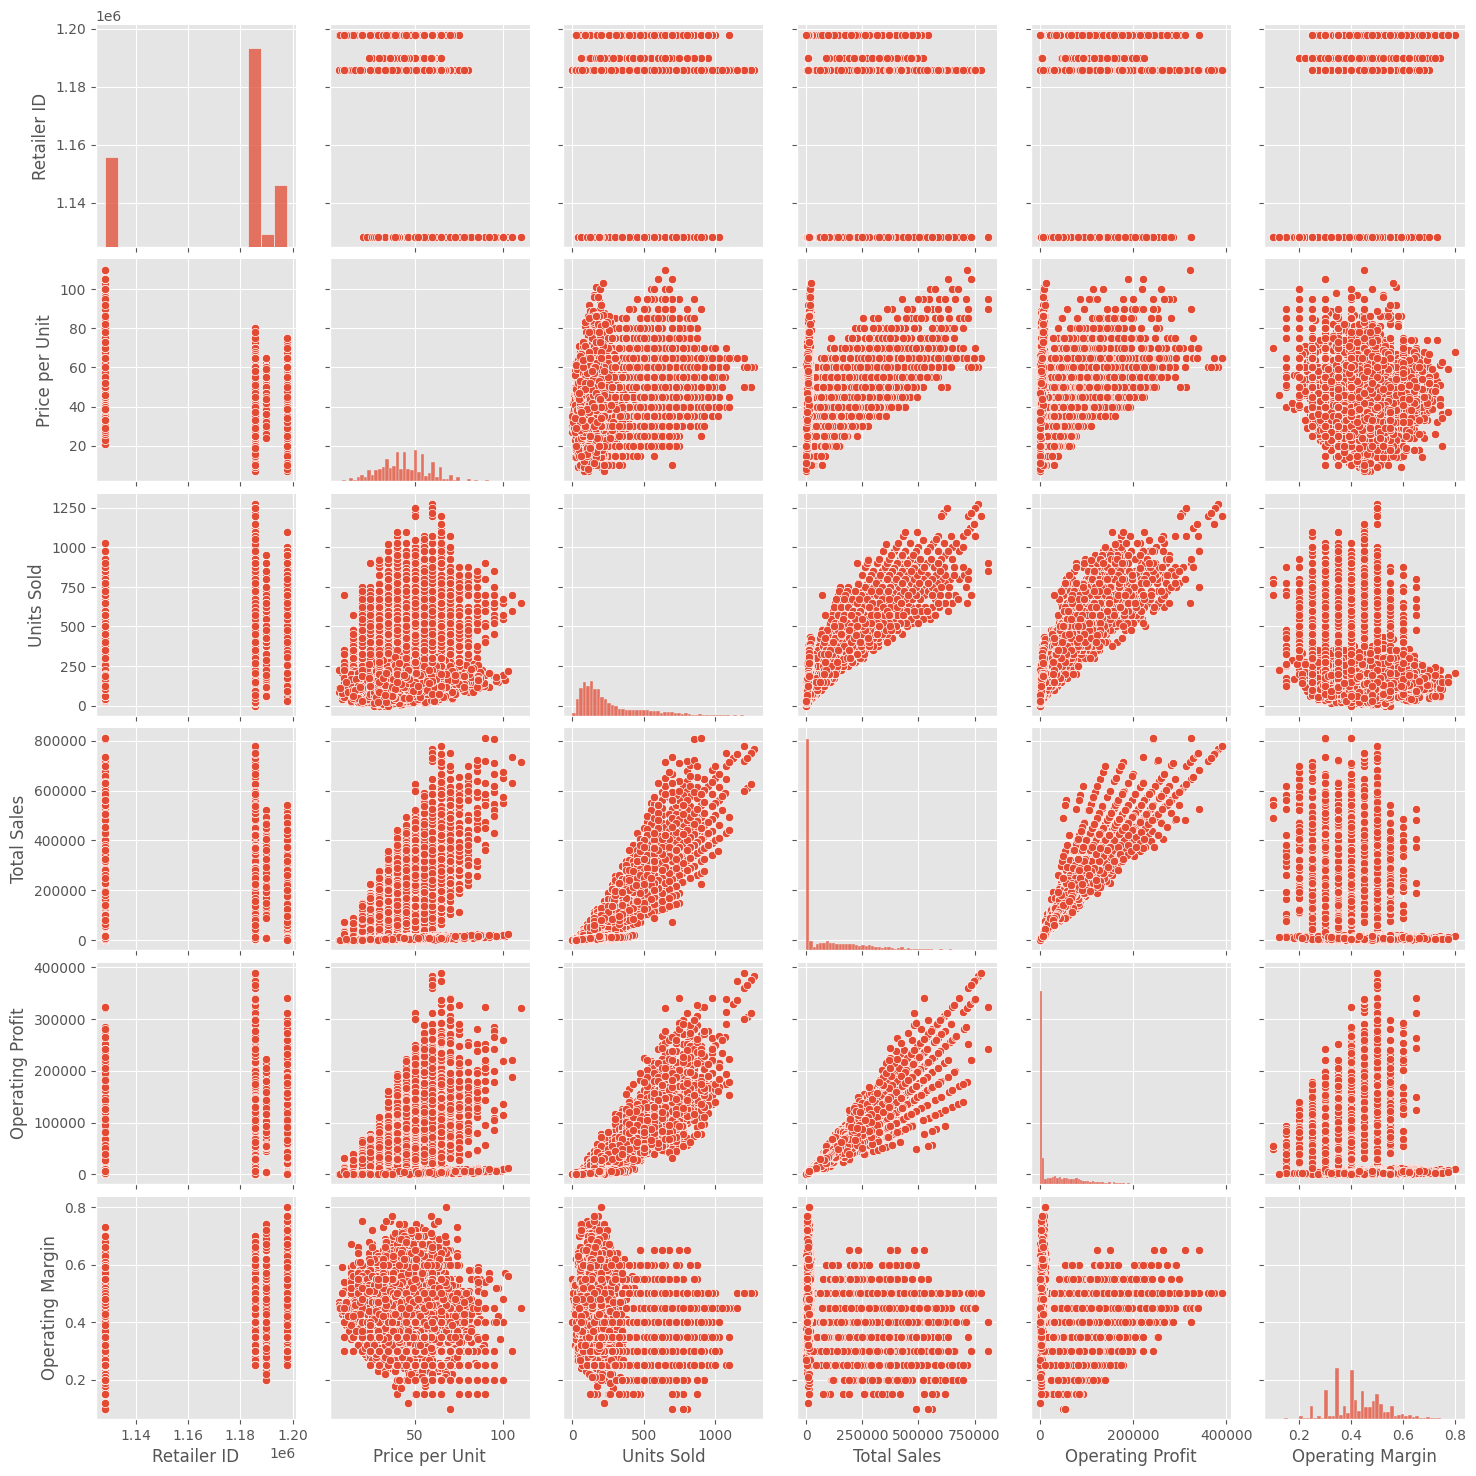

In [92]:
sns.pairplot(train_df)

<ipython-input-96-19495db8f44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot= True)


<function matplotlib.pyplot.show(close=None, block=None)>

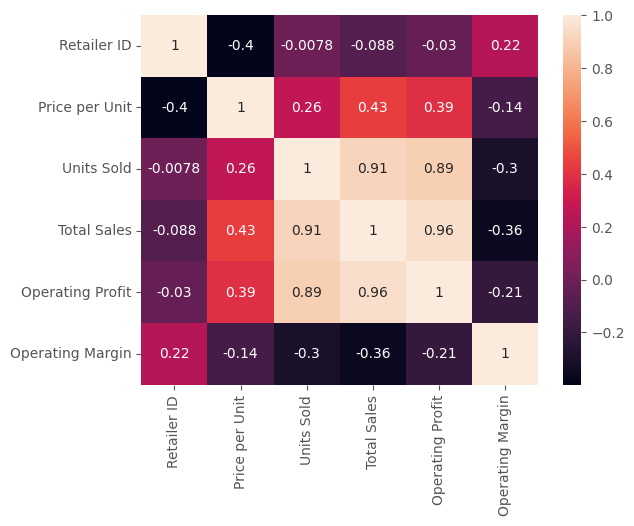

In [96]:
sns.heatmap(train_df.corr(), annot= True)
plt.show